In [1]:
using Distributions
using StatsPlots
default(fmt=:png)
safediv(x, y) = x == 0 ? zero(x/y) : x/y
safemul(x, y) = x == 0 ? zero(x*y) : x*y

ecdf_naive(A, x) = count(≤(x), A) / length(A)

function pvalue_bin_score(x, n, p)
    z = safediv(x - n*p, √(n*p*(1-p)))
    2ccdf(Normal(), abs(z))
end

function pvalue_bin_wald(x, n, p)
    p̂ = x/n
    z = safediv(x - n*p, √(n*p̂*(1-p̂)))
    2ccdf(Normal(), abs(z))
end

function pvalue_bin_logodds_wald(x, n, p)    
    p̂ = x/n
    d = log(p̂ == p ? one(p̂/p) : p̂/p) - log(p̂ == p ? one((1-p̂)/(1-p)) : (1-p̂)/(1-p))
    z = safemul(√(n*p̂*(1-p̂)), d)
    2ccdf(Normal(), abs(z))
end

@show pvalue_bin_logodds_wald(0, 10, 0.0)
@show pvalue_bin_logodds_wald(0, 10, 0.5)
@show pvalue_bin_logodds_wald(0, 10, 1.0)

function plot_pvalue_functions(x, n; kwargs...)
    ps = 0:0.001:1
    plot(ps, p -> pvalue_bin_score(x, n, p); label="score")
    plot!(ps, p -> pvalue_bin_logodds_wald(x, n, p); label="log odds Wald", ls=:dash)
    plot!(ps, p -> pvalue_bin_wald(x, n, p); label="Wald", ls=:dashdot)
    plot!(; kwargs...)
end

pvalue_bin_logodds_wald(0, 10, 0.0) = 1.0
pvalue_bin_logodds_wald(0, 10, 0.5) = 1.0
pvalue_bin_logodds_wald(0, 10, 1.0) = 1.0


plot_pvalue_functions (generic function with 1 method)

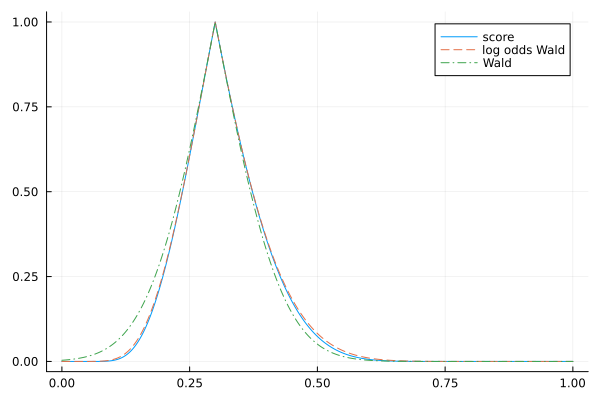

In [2]:
plot_pvalue_functions(6, 20)

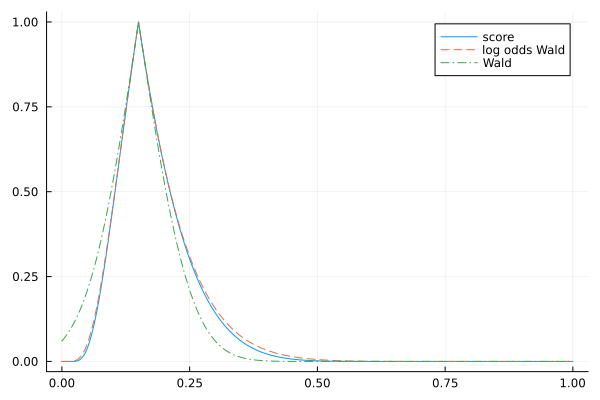

In [3]:
plot_pvalue_functions(3, 20)

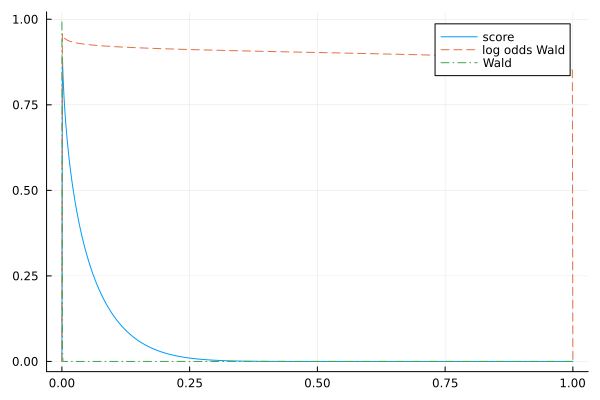

In [4]:
plot_pvalue_functions(0.0001, 20)

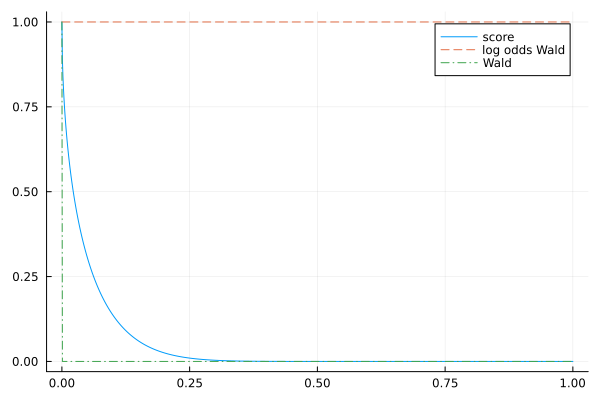

In [5]:
plot_pvalue_functions(0, 20)

[Aggresti-Coull 1998](https://www.jstor.org/stable/2685469) によれば, 母比率に関するWilson型のスコアP値函数が優れていると考えられる.

母比率に関するスコアP値函数との比較すると, 母比率に関するWald型P値函数と母比率の対数オッズに関するWald型P値函数では後者の方が違いが小さい.

しかし, 母比率に関するWald型P値函数も母比率の対数オッズに関するWald型P値函数もデータが $x=0,n$ の場合には破綻してしまう。